In [12]:
%matplotlib inline

import numpy as np

import random


import matplotlib
matplotlib.use('TkAgg', warn = False)
from matplotlib import pyplot
import os
import time


from pandas import DataFrame
from pandas.io.parsers import read_csv

from PIL import Image , ImageDraw


import tensorflow as tf

ImportError: No module named 'shuffle'

In [4]:
FROOT = os.getcwd() # Path to your project folder
FTRAIN = 'F:/datesets/kaggle-facial-keypoints-detection/training.csv'
FTEST = 'F:/datesets/kaggle-facial-keypoints-detection/test.csv'
FLOOKUP = 'F:/datesets/kaggle-facial-keypoints-detection/IdLookupTable.csv'

In [13]:
def load(test = False, cols = None):
    """
    Loads the dataset.
    
    Parameters
    ----------
    test  : optional, defaults to `False`
            Flag indicating if we need to load from `FTEST` (`True`) or `FTRAIN` (`False`)
    cols  : optional, defaults to `None`
            A list of columns you're interested in. If specified only returns these columns.
               
    Returns
    -------
    A tuple of X and y, if `test` was set to `True` y contains `None`.    
    """
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        #X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [6]:
def plot_sample(x, y, axis):
    """
    Plots a single sample image with keypoints on top.
    
    Parameters
    ----------
    x     : 
            Image data.
    y     : 
            Keypoints to plot.
    axis  :
            Plot over which to draw the sample.   
    """
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

In [14]:
X, y = load()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [15]:
y[0][4]

0.24129324

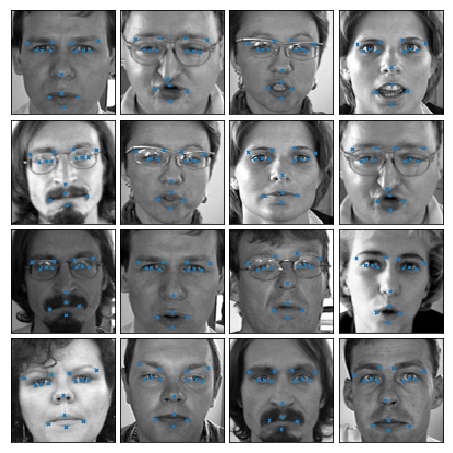

In [16]:
fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
delta = 1000
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i+delta], y[i+delta], ax)
pyplot.show()

In [ ]:
# asdfasdfsd

In [17]:
#根据给定的shape定义并初始化卷积核的权值变量
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

#根据shape初始化bias变量
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='VALID')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [18]:
x = tf.placeholder("float", shape=[None, 96, 96, 1])
y_ = tf.placeholder("float", shape=[None, 30])
keep_prob = tf.placeholder("float")

def model():
    W_conv1 = weight_variable([3, 3, 1, 32])
    b_conv1 = bias_variable([32])

    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([2, 2, 32, 64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_conv3 = weight_variable([2, 2, 64, 128])
    b_conv3 = bias_variable([128])

    h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)

    W_fc1 = weight_variable([11 * 11 * 128, 500])
    b_fc1 = bias_variable([500])

    h_pool3_flat = tf.reshape(h_pool3, [-1, 11 * 11 * 128])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

    W_fc2 = weight_variable([500, 500])
    b_fc2 = bias_variable([500])

    h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)
    h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

    W_fc3 = weight_variable([500, 30])
    b_fc3 = bias_variable([30])

    y_conv = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_ - y_conv)))
    return y_conv, rmse

In [19]:
def save_model(saver,sess,save_path):
    path = saver.save(sess, save_path)

In [28]:
#main

SAVE_PATH = 'F:/datesets/kaggle-facial-keypoints-detection/model'


VALIDATION_SIZE = 100    #验证集大小
EPOCHS = 100             #迭代次数
BATCH_SIZE = 64          #每个batch大小，稍微大一点的batch会更稳定
EARLY_STOP_PATIENCE = 10 #控制early stopping的参数

sess = tf.InteractiveSession()
y_conv, rmse = model()
train_step = tf.train.AdamOptimizer(1e-3).minimize(rmse)

#变量都要初始化 
sess.run(tf.initialize_all_variables())
X = X.reshape((-1,96,96,1))
X_valid, y_valid = X[:VALIDATION_SIZE], y[:VALIDATION_SIZE]
X_train, y_train = X[VALIDATION_SIZE:], y[VALIDATION_SIZE:]

best_validation_loss = 1000000.0
current_epoch = 0
TRAIN_SIZE = X_train.shape[0]
train_index = range(TRAIN_SIZE)
np.random.shuffle(list(train_index))
X_train, y_train = X_train[train_index], y_train[train_index]

saver = tf.train.Saver()

print ('begin training..., train dataset size: %d'% TRAIN_SIZE)
for i in range(EPOCHS):
    random.shuffle(list(train_index))  #每个epoch都shuffle一下效果更好
    X_train, y_train = X_train[train_index], y_train[train_index]

    for j in range(0,TRAIN_SIZE,BATCH_SIZE):
        print ('epoch %d , train %d samples done...' % (i,j))

        train_step.run(feed_dict={x:X_train[j:j+BATCH_SIZE], 
            y_:y_train[j:j+BATCH_SIZE], keep_prob:0.5})

    #电脑太渣，用所有训练样本计算train_loss居然死机，只好注释了。
    #train_loss = rmse.eval(feed_dict={x:X_train, y_:y_train, keep_prob: 1.0})
    validation_loss = rmse.eval(feed_dict={x:X_valid, y_:y_valid, keep_prob: 1.0})

    print ('epoch %d done! validation loss: %f' % (i, validation_loss*96.0))
    if validation_loss < best_validation_loss:
        best_validation_loss = validation_loss
        current_epoch = i
        save_model(saver,sess,SAVE_PATH)   #即时保存最好的结果
    elif (i - current_epoch) >= EARLY_STOP_PATIENCE:
        print ('early stopping')
        break

C:\Users\lot\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


begin training..., train dataset size: 2040
epoch 0 , train 0 samples done...
epoch 0 , train 64 samples done...
epoch 0 , train 128 samples done...
epoch 0 , train 192 samples done...
epoch 0 , train 256 samples done...
epoch 0 , train 320 samples done...
epoch 0 , train 384 samples done...
epoch 0 , train 448 samples done...
epoch 0 , train 512 samples done...
epoch 0 , train 576 samples done...
epoch 0 , train 640 samples done...
epoch 0 , train 704 samples done...
epoch 0 , train 768 samples done...
epoch 0 , train 832 samples done...
epoch 0 , train 896 samples done...
epoch 0 , train 960 samples done...
epoch 0 , train 1024 samples done...
epoch 0 , train 1088 samples done...
epoch 0 , train 1152 samples done...
epoch 0 , train 1216 samples done...
epoch 0 , train 1280 samples done...
epoch 0 , train 1344 samples done...
epoch 0 , train 1408 samples done...
epoch 0 , train 1472 samples done...
epoch 0 , train 1536 samples done...
epoch 0 , train 1600 samples done...
epoch 0 , tra

epoch 6 , train 1728 samples done...
epoch 6 , train 1792 samples done...
epoch 6 , train 1856 samples done...
epoch 6 , train 1920 samples done...
epoch 6 , train 1984 samples done...
epoch 6 done! validation loss: 6.639427
epoch 7 , train 0 samples done...
epoch 7 , train 64 samples done...
epoch 7 , train 128 samples done...
epoch 7 , train 192 samples done...
epoch 7 , train 256 samples done...
epoch 7 , train 320 samples done...
epoch 7 , train 384 samples done...
epoch 7 , train 448 samples done...
epoch 7 , train 512 samples done...
epoch 7 , train 576 samples done...
epoch 7 , train 640 samples done...
epoch 7 , train 704 samples done...
epoch 7 , train 768 samples done...
epoch 7 , train 832 samples done...
epoch 7 , train 896 samples done...
epoch 7 , train 960 samples done...
epoch 7 , train 1024 samples done...
epoch 7 , train 1088 samples done...
epoch 7 , train 1152 samples done...
epoch 7 , train 1216 samples done...
epoch 7 , train 1280 samples done...
epoch 7 , train 1

epoch 13 , train 1280 samples done...
epoch 13 , train 1344 samples done...
epoch 13 , train 1408 samples done...
epoch 13 , train 1472 samples done...
epoch 13 , train 1536 samples done...
epoch 13 , train 1600 samples done...
epoch 13 , train 1664 samples done...
epoch 13 , train 1728 samples done...
epoch 13 , train 1792 samples done...
epoch 13 , train 1856 samples done...
epoch 13 , train 1920 samples done...
epoch 13 , train 1984 samples done...
epoch 13 done! validation loss: 6.297742
epoch 14 , train 0 samples done...
epoch 14 , train 64 samples done...
epoch 14 , train 128 samples done...
epoch 14 , train 192 samples done...
epoch 14 , train 256 samples done...
epoch 14 , train 320 samples done...
epoch 14 , train 384 samples done...
epoch 14 , train 448 samples done...
epoch 14 , train 512 samples done...
epoch 14 , train 576 samples done...
epoch 14 , train 640 samples done...
epoch 14 , train 704 samples done...
epoch 14 , train 768 samples done...
epoch 14 , train 832 samp

epoch 20 , train 640 samples done...
epoch 20 , train 704 samples done...
epoch 20 , train 768 samples done...
epoch 20 , train 832 samples done...
epoch 20 , train 896 samples done...
epoch 20 , train 960 samples done...
epoch 20 , train 1024 samples done...
epoch 20 , train 1088 samples done...
epoch 20 , train 1152 samples done...
epoch 20 , train 1216 samples done...
epoch 20 , train 1280 samples done...
epoch 20 , train 1344 samples done...
epoch 20 , train 1408 samples done...
epoch 20 , train 1472 samples done...
epoch 20 , train 1536 samples done...
epoch 20 , train 1600 samples done...
epoch 20 , train 1664 samples done...
epoch 20 , train 1728 samples done...
epoch 20 , train 1792 samples done...
epoch 20 , train 1856 samples done...
epoch 20 , train 1920 samples done...
epoch 20 , train 1984 samples done...
epoch 20 done! validation loss: 5.302113
epoch 21 , train 0 samples done...
epoch 21 , train 64 samples done...
epoch 21 , train 128 samples done...
epoch 21 , train 192 

epoch 27 , train 0 samples done...
epoch 27 , train 64 samples done...
epoch 27 , train 128 samples done...
epoch 27 , train 192 samples done...
epoch 27 , train 256 samples done...
epoch 27 , train 320 samples done...
epoch 27 , train 384 samples done...
epoch 27 , train 448 samples done...
epoch 27 , train 512 samples done...
epoch 27 , train 576 samples done...
epoch 27 , train 640 samples done...
epoch 27 , train 704 samples done...
epoch 27 , train 768 samples done...
epoch 27 , train 832 samples done...
epoch 27 , train 896 samples done...
epoch 27 , train 960 samples done...
epoch 27 , train 1024 samples done...
epoch 27 , train 1088 samples done...
epoch 27 , train 1152 samples done...
epoch 27 , train 1216 samples done...
epoch 27 , train 1280 samples done...
epoch 27 , train 1344 samples done...
epoch 27 , train 1408 samples done...
epoch 27 , train 1472 samples done...
epoch 27 , train 1536 samples done...
epoch 27 , train 1600 samples done...
epoch 27 , train 1664 samples d

epoch 33 , train 1344 samples done...
epoch 33 , train 1408 samples done...
epoch 33 , train 1472 samples done...
epoch 33 , train 1536 samples done...
epoch 33 , train 1600 samples done...
epoch 33 , train 1664 samples done...
epoch 33 , train 1728 samples done...
epoch 33 , train 1792 samples done...
epoch 33 , train 1856 samples done...
epoch 33 , train 1920 samples done...
epoch 33 , train 1984 samples done...
epoch 33 done! validation loss: 4.487900
epoch 34 , train 0 samples done...
epoch 34 , train 64 samples done...
epoch 34 , train 128 samples done...
epoch 34 , train 192 samples done...
epoch 34 , train 256 samples done...
epoch 34 , train 320 samples done...
epoch 34 , train 384 samples done...
epoch 34 , train 448 samples done...
epoch 34 , train 512 samples done...
epoch 34 , train 576 samples done...
epoch 34 , train 640 samples done...
epoch 34 , train 704 samples done...
epoch 34 , train 768 samples done...
epoch 34 , train 832 samples done...
epoch 34 , train 896 sampl

epoch 40 , train 576 samples done...
epoch 40 , train 640 samples done...
epoch 40 , train 704 samples done...
epoch 40 , train 768 samples done...
epoch 40 , train 832 samples done...
epoch 40 , train 896 samples done...
epoch 40 , train 960 samples done...
epoch 40 , train 1024 samples done...
epoch 40 , train 1088 samples done...
epoch 40 , train 1152 samples done...
epoch 40 , train 1216 samples done...
epoch 40 , train 1280 samples done...
epoch 40 , train 1344 samples done...
epoch 40 , train 1408 samples done...
epoch 40 , train 1472 samples done...
epoch 40 , train 1536 samples done...
epoch 40 , train 1600 samples done...
epoch 40 , train 1664 samples done...
epoch 40 , train 1728 samples done...
epoch 40 , train 1792 samples done...
epoch 40 , train 1856 samples done...
epoch 40 , train 1920 samples done...
epoch 40 , train 1984 samples done...
epoch 40 done! validation loss: 4.964315
epoch 41 , train 0 samples done...
epoch 41 , train 64 samples done...
epoch 41 , train 128 

epoch 46 , train 1920 samples done...
epoch 46 , train 1984 samples done...
epoch 46 done! validation loss: 3.982358
epoch 47 , train 0 samples done...
epoch 47 , train 64 samples done...
epoch 47 , train 128 samples done...
epoch 47 , train 192 samples done...
epoch 47 , train 256 samples done...
epoch 47 , train 320 samples done...
epoch 47 , train 384 samples done...
epoch 47 , train 448 samples done...
epoch 47 , train 512 samples done...
epoch 47 , train 576 samples done...
epoch 47 , train 640 samples done...
epoch 47 , train 704 samples done...
epoch 47 , train 768 samples done...
epoch 47 , train 832 samples done...
epoch 47 , train 896 samples done...
epoch 47 , train 960 samples done...
epoch 47 , train 1024 samples done...
epoch 47 , train 1088 samples done...
epoch 47 , train 1152 samples done...
epoch 47 , train 1216 samples done...
epoch 47 , train 1280 samples done...
epoch 47 , train 1344 samples done...
epoch 47 , train 1408 samples done...
epoch 47 , train 1472 sample

epoch 53 , train 1344 samples done...
epoch 53 , train 1408 samples done...
epoch 53 , train 1472 samples done...
epoch 53 , train 1536 samples done...
epoch 53 , train 1600 samples done...
epoch 53 , train 1664 samples done...
epoch 53 , train 1728 samples done...
epoch 53 , train 1792 samples done...
epoch 53 , train 1856 samples done...
epoch 53 , train 1920 samples done...
epoch 53 , train 1984 samples done...
epoch 53 done! validation loss: 3.641838
epoch 54 , train 0 samples done...
epoch 54 , train 64 samples done...
epoch 54 , train 128 samples done...
epoch 54 , train 192 samples done...
epoch 54 , train 256 samples done...
epoch 54 , train 320 samples done...
epoch 54 , train 384 samples done...
epoch 54 , train 448 samples done...
epoch 54 , train 512 samples done...
epoch 54 , train 576 samples done...
epoch 54 , train 640 samples done...
epoch 54 , train 704 samples done...
epoch 54 , train 768 samples done...
epoch 54 , train 832 samples done...
epoch 54 , train 896 sampl

In [27]:
sess.close()